In [60]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
data= pd.read_csv("/Users/pavansharma/Desktop/bank+marketing/bank-additional/bank-additional-full.csv",sep=";")
print(data.shape) # prints data shape
print(data.columns) # print columns
data.head()

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='y', ylabel='count'>

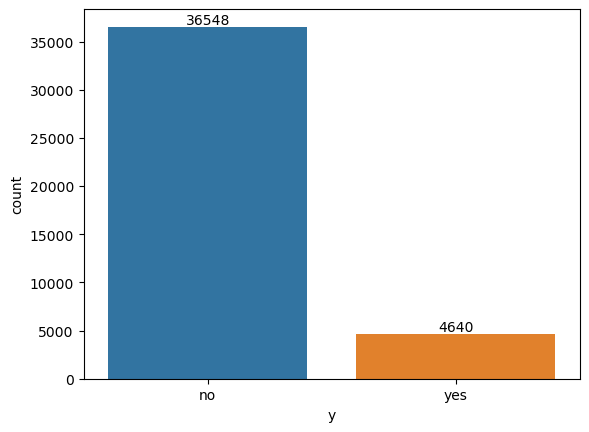

In [3]:
#to get the counts of Yes and NO
counts = data['y'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha= 'center', va= 'bottom')
sns.countplot(x='y',data=data)


As we can see that the data is heavily skewed. We need to balance the dataset to ensure that the model sees an equal number of instances from each class to imporve the accuracy.

In [4]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

In this code we are attempting to balance out the minority class that "yes" instances for our dataset. We attempt to double the instances of yes and the multiplication occurs till we get a more balanced class distribution. The con of using this method is that it can also lead to overfitting and other issues.

<Axes: xlabel='y', ylabel='count'>

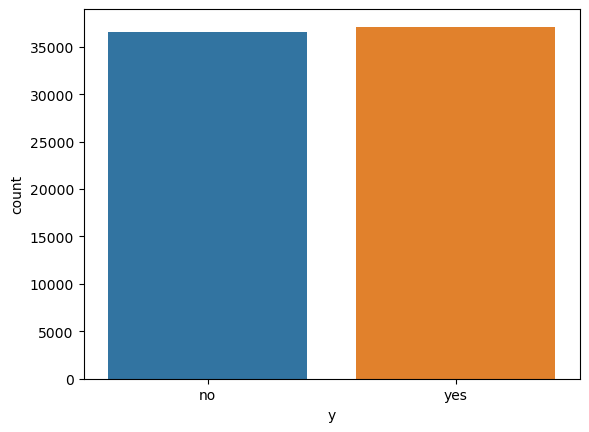

In [5]:
sns.countplot(x='y',data=data)

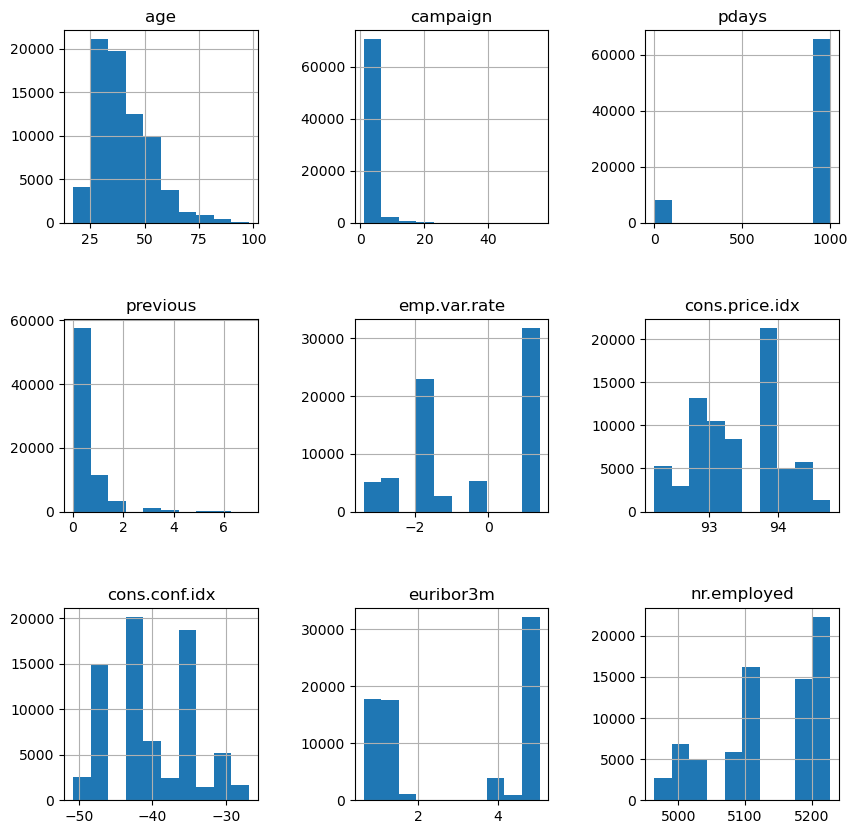

In [6]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

### 1. We can see that the data is not evenly distributed so we need to standardize the data 
### 2. We can see that "pdays" isn't distributed properly so it would be better to split the table into two halves inorder to use the data more effectively  

In [7]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In this code, we attempt to split the data in the column Pdays. There are a few customers who haven't been contacted in a long time, so their data is represented as 999. We are attempting to change that by creating two tables: one for customers who have been contacted within 0-29 days and another for those who have been contacted more than 30 days ago, represented as 30. This is done to avoid seeing a huge difference between values.

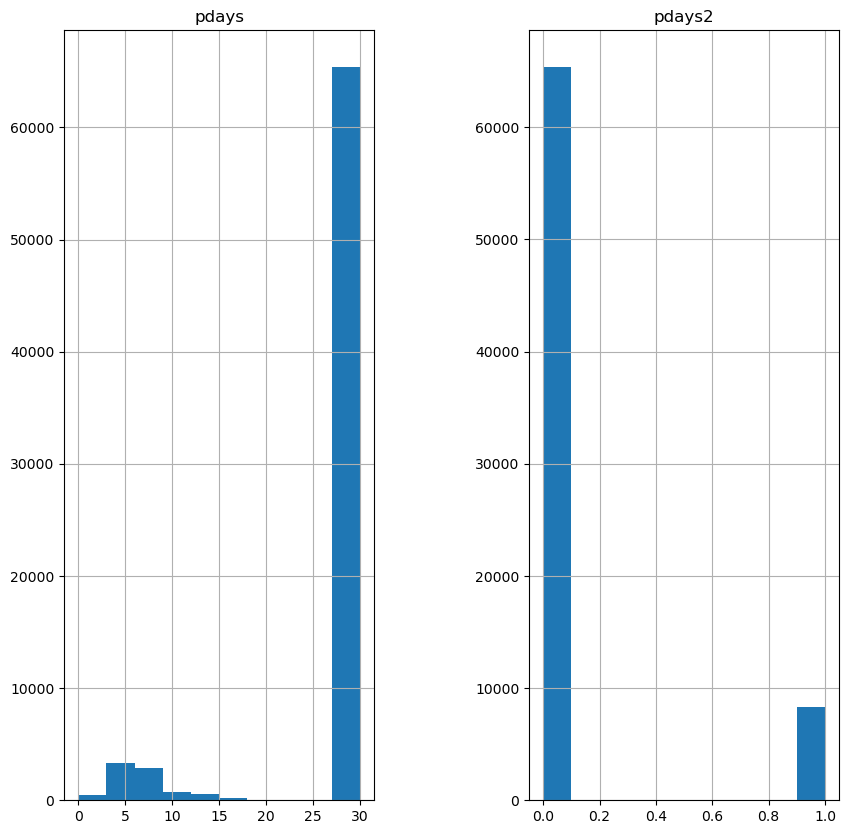

In [8]:
header = ['pdays', 'pdays2']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [9]:
### Selecting only the numerical columns for standardization
numerical_columns = data.select_dtypes(include=['int','float']).columns

### initializing the standard sclaer
scaler = StandardScaler()

### fit the scaler and transfrom the data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,1.292767,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.35119,-0.449189,nonexistent,0.927544,0.814467,0.706927,1.003071,0.639706,no,-0.355946
1,1.375722,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.35119,-0.449189,nonexistent,0.927544,0.814467,0.706927,1.003071,0.639706,no,-0.355946
2,-0.283379,services,married,high.school,no,yes,no,telephone,may,mon,...,0.35119,-0.449189,nonexistent,0.927544,0.814467,0.706927,1.003071,0.639706,no,-0.355946
3,-0.034514,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.35119,-0.449189,nonexistent,0.927544,0.814467,0.706927,1.003071,0.639706,no,-0.355946
4,1.292767,services,married,high.school,no,no,yes,telephone,may,mon,...,0.35119,-0.449189,nonexistent,0.927544,0.814467,0.706927,1.003071,0.639706,no,-0.355946


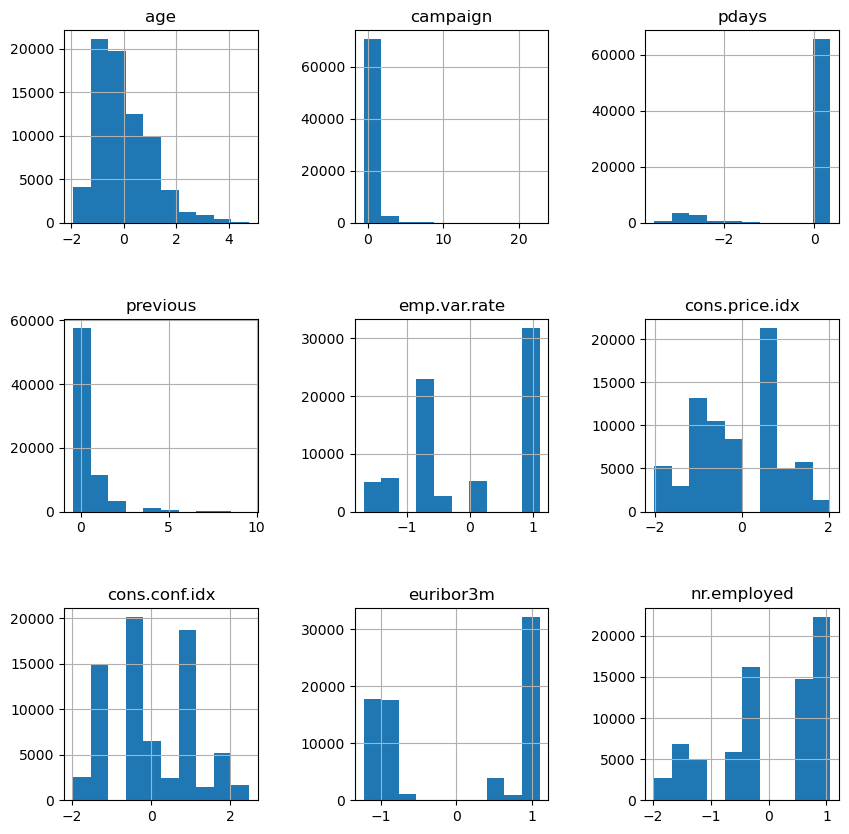

In [11]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [12]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

we are mapping categorical values of the columns poutcome, default, housing, and loan to numerical values. This process is known as encoding categorical variables.
we are doing this because many machine learning algorithms, particularly those based on mathematical computations, require numerical input. By converting categorical variables to numerical ones, we make the data suitable for these algorithms.

In [13]:
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.292767,1,1,1,-0.353136,-0.567365,0.35119,-0.449189,0,0.927544,...,0,1,0,0,0,0,1,0,0,0
1,1.375722,0,1,1,-0.663809,-0.567365,0.35119,-0.449189,0,0.927544,...,0,1,0,0,0,0,1,0,0,0
2,-0.283379,1,-1,1,-0.450221,-0.567365,0.35119,-0.449189,0,0.927544,...,0,1,0,0,0,0,1,0,0,0
3,-0.034514,1,1,1,-0.658261,-0.567365,0.35119,-0.449189,0,0.927544,...,0,1,0,0,0,0,1,0,0,0
4,1.292767,1,1,-1,-0.225538,-0.567365,0.35119,-0.449189,0,0.927544,...,0,1,0,0,0,0,1,0,0,0


we are using one-hot encoding to handle the nominal variables as it helps converts categorical variables into a form that can be provided to machine learning algorithms to improve predictions

In [14]:
dataProcessed.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays2',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
    

In [15]:
dataProcessed.to_csv("/Users/pavansharma/Desktop/bank+marketing/bank-additional/full_transformed.csv", index=False)

# Linear Regression

In [36]:
TData = dataProcessed
feature_names = TData.drop('y', axis=1).columns

In [24]:
# Separating features and result vectors
X = TData.drop('y', axis=1).values
y = TData['y'].values

## Test and Train Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Predict on the test set
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8697344011583187
Precision: 0.8609335318329101
Recall: 0.883923754720374
F1-score: 0.8722771837984118
ROC-AUC: 0.9369939938139246


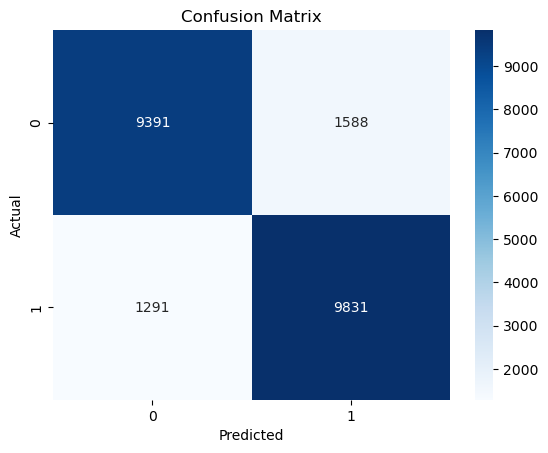

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10979
           1       0.86      0.88      0.87     11122

    accuracy                           0.87     22101
   macro avg       0.87      0.87      0.87     22101
weighted avg       0.87      0.87      0.87     22101



In [43]:
coefficients = pd.DataFrame(logreg.coef_.flatten(), index=feature_names, columns=['coef'])
print(coefficients)

                                   coef
age                            0.018786
default                        0.127347
housing                       -0.005074
loan                           0.021436
duration                       2.531579
campaign                      -0.083646
pdays                         -0.317145
previous                      -0.092081
poutcome                       0.172025
emp.var.rate                  -3.886790
cons.price.idx                 1.553435
cons.conf.idx                  0.030598
euribor3m                      1.144519
nr.employed                    0.383250
pdays2                         0.063229
job_admin.                     0.017212
job_blue-collar               -0.083190
job_entrepreneur              -0.041774
job_housemaid                  0.007015
job_management                -0.025038
job_retired                    0.107829
job_self-employed             -0.033208
job_services                  -0.030547
job_student                    0.062526


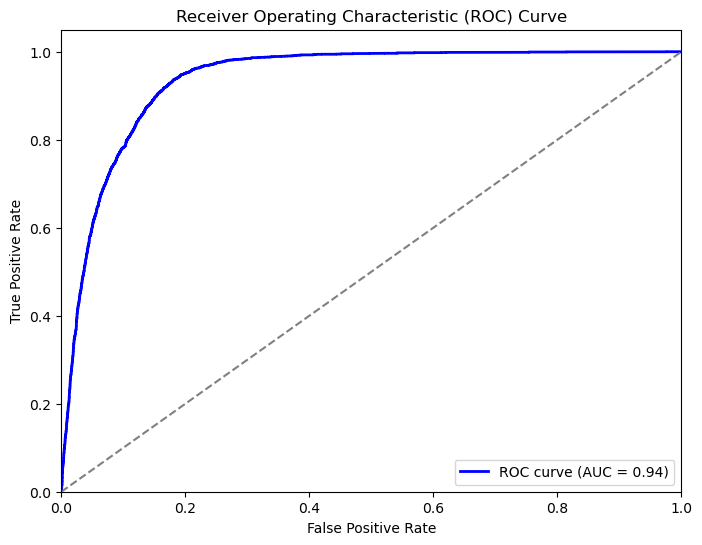

In [46]:
# Calculate probabilities of positive class
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# The model shows good overall performance, with high accuracy, precision, recall, and F1-score.
# The ROC-AUC score indicates that the model performs well in distinguishing between positive and negative instances.
## Auc
### An AUC of 0.94 suggests that the logistic regression model is highly effective at distinguishing between individuals who will take a term loan and those who will not.
## Accuracy:
### An accuracy of 0.8697 indicates that approximately 87% of the instances in the test set are classified correctly by the model.
## Precision:
### A precision of 0.8609 means that when the model predicts a customer will subscribe to a term deposit, it is correct about 86.09% of the time.
## Recall:
### A recall of 0.8839 indicates that the model correctly identifies approximately 88.39% of all actual customers who subscribed to a term deposit.
## F1-score:
### An F1-score of 0.8723 indicates a good balance between precision and recall for the positive class.

#  Random Forest

In [48]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [49]:
# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]

In [51]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1-score: {f1_rf}')
print(f'ROC-AUC: {roc_auc_rf}')

Accuracy: 0.9655219220849736
Precision: 0.935880175025244
Recall: 1.0
F1-score: 0.9668782056854733
ROC-AUC: 0.9998871126334448


Text(0.5, 1.0, 'Confusion Matrix')

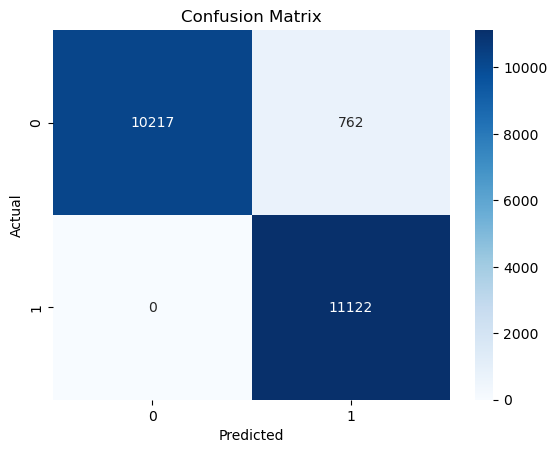

In [53]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [54]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10979
           1       0.94      1.00      0.97     11122

    accuracy                           0.97     22101
   macro avg       0.97      0.97      0.97     22101
weighted avg       0.97      0.97      0.97     22101



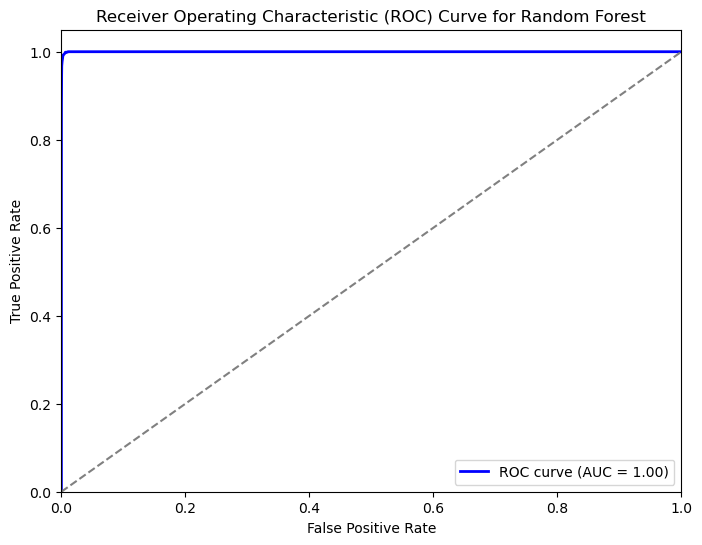

In [55]:
# Calculate probabilities of positive class
y_pred_proba_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculate ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# The Random Forest classifier demonstrates outstanding overall performance, with high accuracy, precision, recall, F1-score, and ROC-AUC.

# The model correctly identifies all instances of customers who subscribed to a term loan (recall of 1.0), indicating its effectiveness in capturing positive instances.

## Accuracy:
### An accuracy of 0.9655 indicates that approximately 96.55% of the instances in the test set are classified correctly by the Random Forest model.
## Precision:
###  A precision of 0.9359 means that when the model predicts a customer will subscribe to a term loan, it is correct about 93.59% of the time.
## Recall:
###  A recall of 1.0 indicates that the model correctly identifies all actual customers who subscribed to a term loan.
## F1-score:
###  An F1-score of 0.9669 indicates a good balance between precision and recall for the positive class.
## ROC-AUC:
### A very high ROC-AUC of 0.9999 suggests that the Random Forest model has excellent discriminatory power, with an almost perfect ability to distinguish between positive and negative instances.


# Neural Network

In [63]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    ])


/Users/pavansharma/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.8247 - loss: 0.3897 - val_accuracy: 0.8907 - val_loss: 0.2744
Epoch 2/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8909 - loss: 0.2710 - val_accuracy: 0.8931 - val_loss: 0.2639
Epoch 3/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8953 - loss: 0.2592 - val_accuracy: 0.8972 - val_loss: 0.2597
Epoch 4/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.9037 - loss: 0.2420 - val_accuracy: 0.9028 - val_loss: 0.2473
Epoch 5/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.9112 - loss: 0.2280 - val_accuracy: 0.9016 - val_loss: 0.2466
Epoch 6/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.9156 - loss: 0.2210 - val_accuracy: 0.9076 - val_loss: 0.2408
Epoch 7/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.9175 - loss: 0.2140 - val_accuracy: 0.9096 - val_loss: 0.2380
Epoch 8/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.9185 -

In [66]:
# Evaluate the model on the test set
y_pred_nn_proba = model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

691/691 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step


In [67]:
# Calculate performance metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn_proba)

print(f'Accuracy: {accuracy_nn}')
print(f'Precision: {precision_nn}')
print(f'Recall: {recall_nn}')
print(f'F1-score: {f1_nn}')
print(f'ROC-AUC: {roc_auc_nn}')

Accuracy: 0.933713406633184
Precision: 0.8990166101975043
Recall: 0.9781514116166157
F1-score: 0.9369159884597167
ROC-AUC: 0.9610506646559512


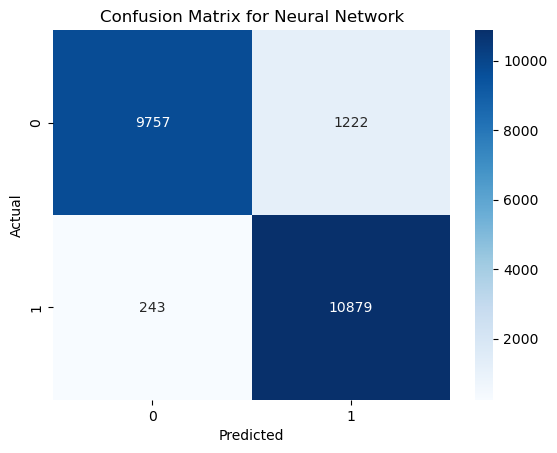

In [68]:
# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()

In [69]:
# Classification Report
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10979
           1       0.90      0.98      0.94     11122

    accuracy                           0.93     22101
   macro avg       0.94      0.93      0.93     22101
weighted avg       0.94      0.93      0.93     22101



## Accuracy:

### An accuracy of 0.9337 indicates that approximately 93.37% of the instances in the test set are classified correctly by the neural network model.

## Precision:

### A precision of 0.8990 means that when the model predicts that a customer will take a term loan, it is correct about 89.90% of the time.

## Recall:

### A recall of 0.9782 indicates that the model correctly identifies approximately 97.82% of the actual customers who subscribed to a term loan.

## F1-score:

### An F1-score of 0.9369 indicates a good balance between precision and recall for the positive class.

## ROC-AUC:

###  A ROC-AUC of 0.9611 suggests that the neural network model has good discriminatory power, with a high ability to distinguish between positive and negative instances.


# Overall, these metrics indicate that the neural network model performs well in predicting whether customers will take a term loan or not. It achieves high accuracy, precision, recall, F1-score, and ROC-AUC, demonstrating its effectiveness in classification tasks.








### Random Forest generally outperformed both Neural Network and Logistic Regression in terms of most performance metrics, achieving the highest accuracy, precision, recall, F1-score, and ROC-AUC.

### Neural Network performed well, with competitive results across all metrics, especially considering its simplicity compared to Random Forest.

### Logistic Regression showed decent performance but was outperformed by both Random Forest and Neural Network in most metrics.

## In summary, while all three models performed reasonably well, Random Forest demonstrated superior performance across most metrics in this particular scenario. 

# The goal is to accurately predict whether individuals will take a term loan (i.e., the positive class), the model's performance in terms of recall becomes crucial. We want to minimize false negatives (i.e., individuals who will take the term loan but are incorrectly predicted as not taking it). Therefore, the model with the highest recall would be the best choice for this specific task.

# In this case, the Random Forest model achieved perfect recall (1.0) for predicting individuals who will take the term loan ("yes"). Therefore, the Random Forest model would be the best choice for accurately identifying individuals likely to take the term loan.

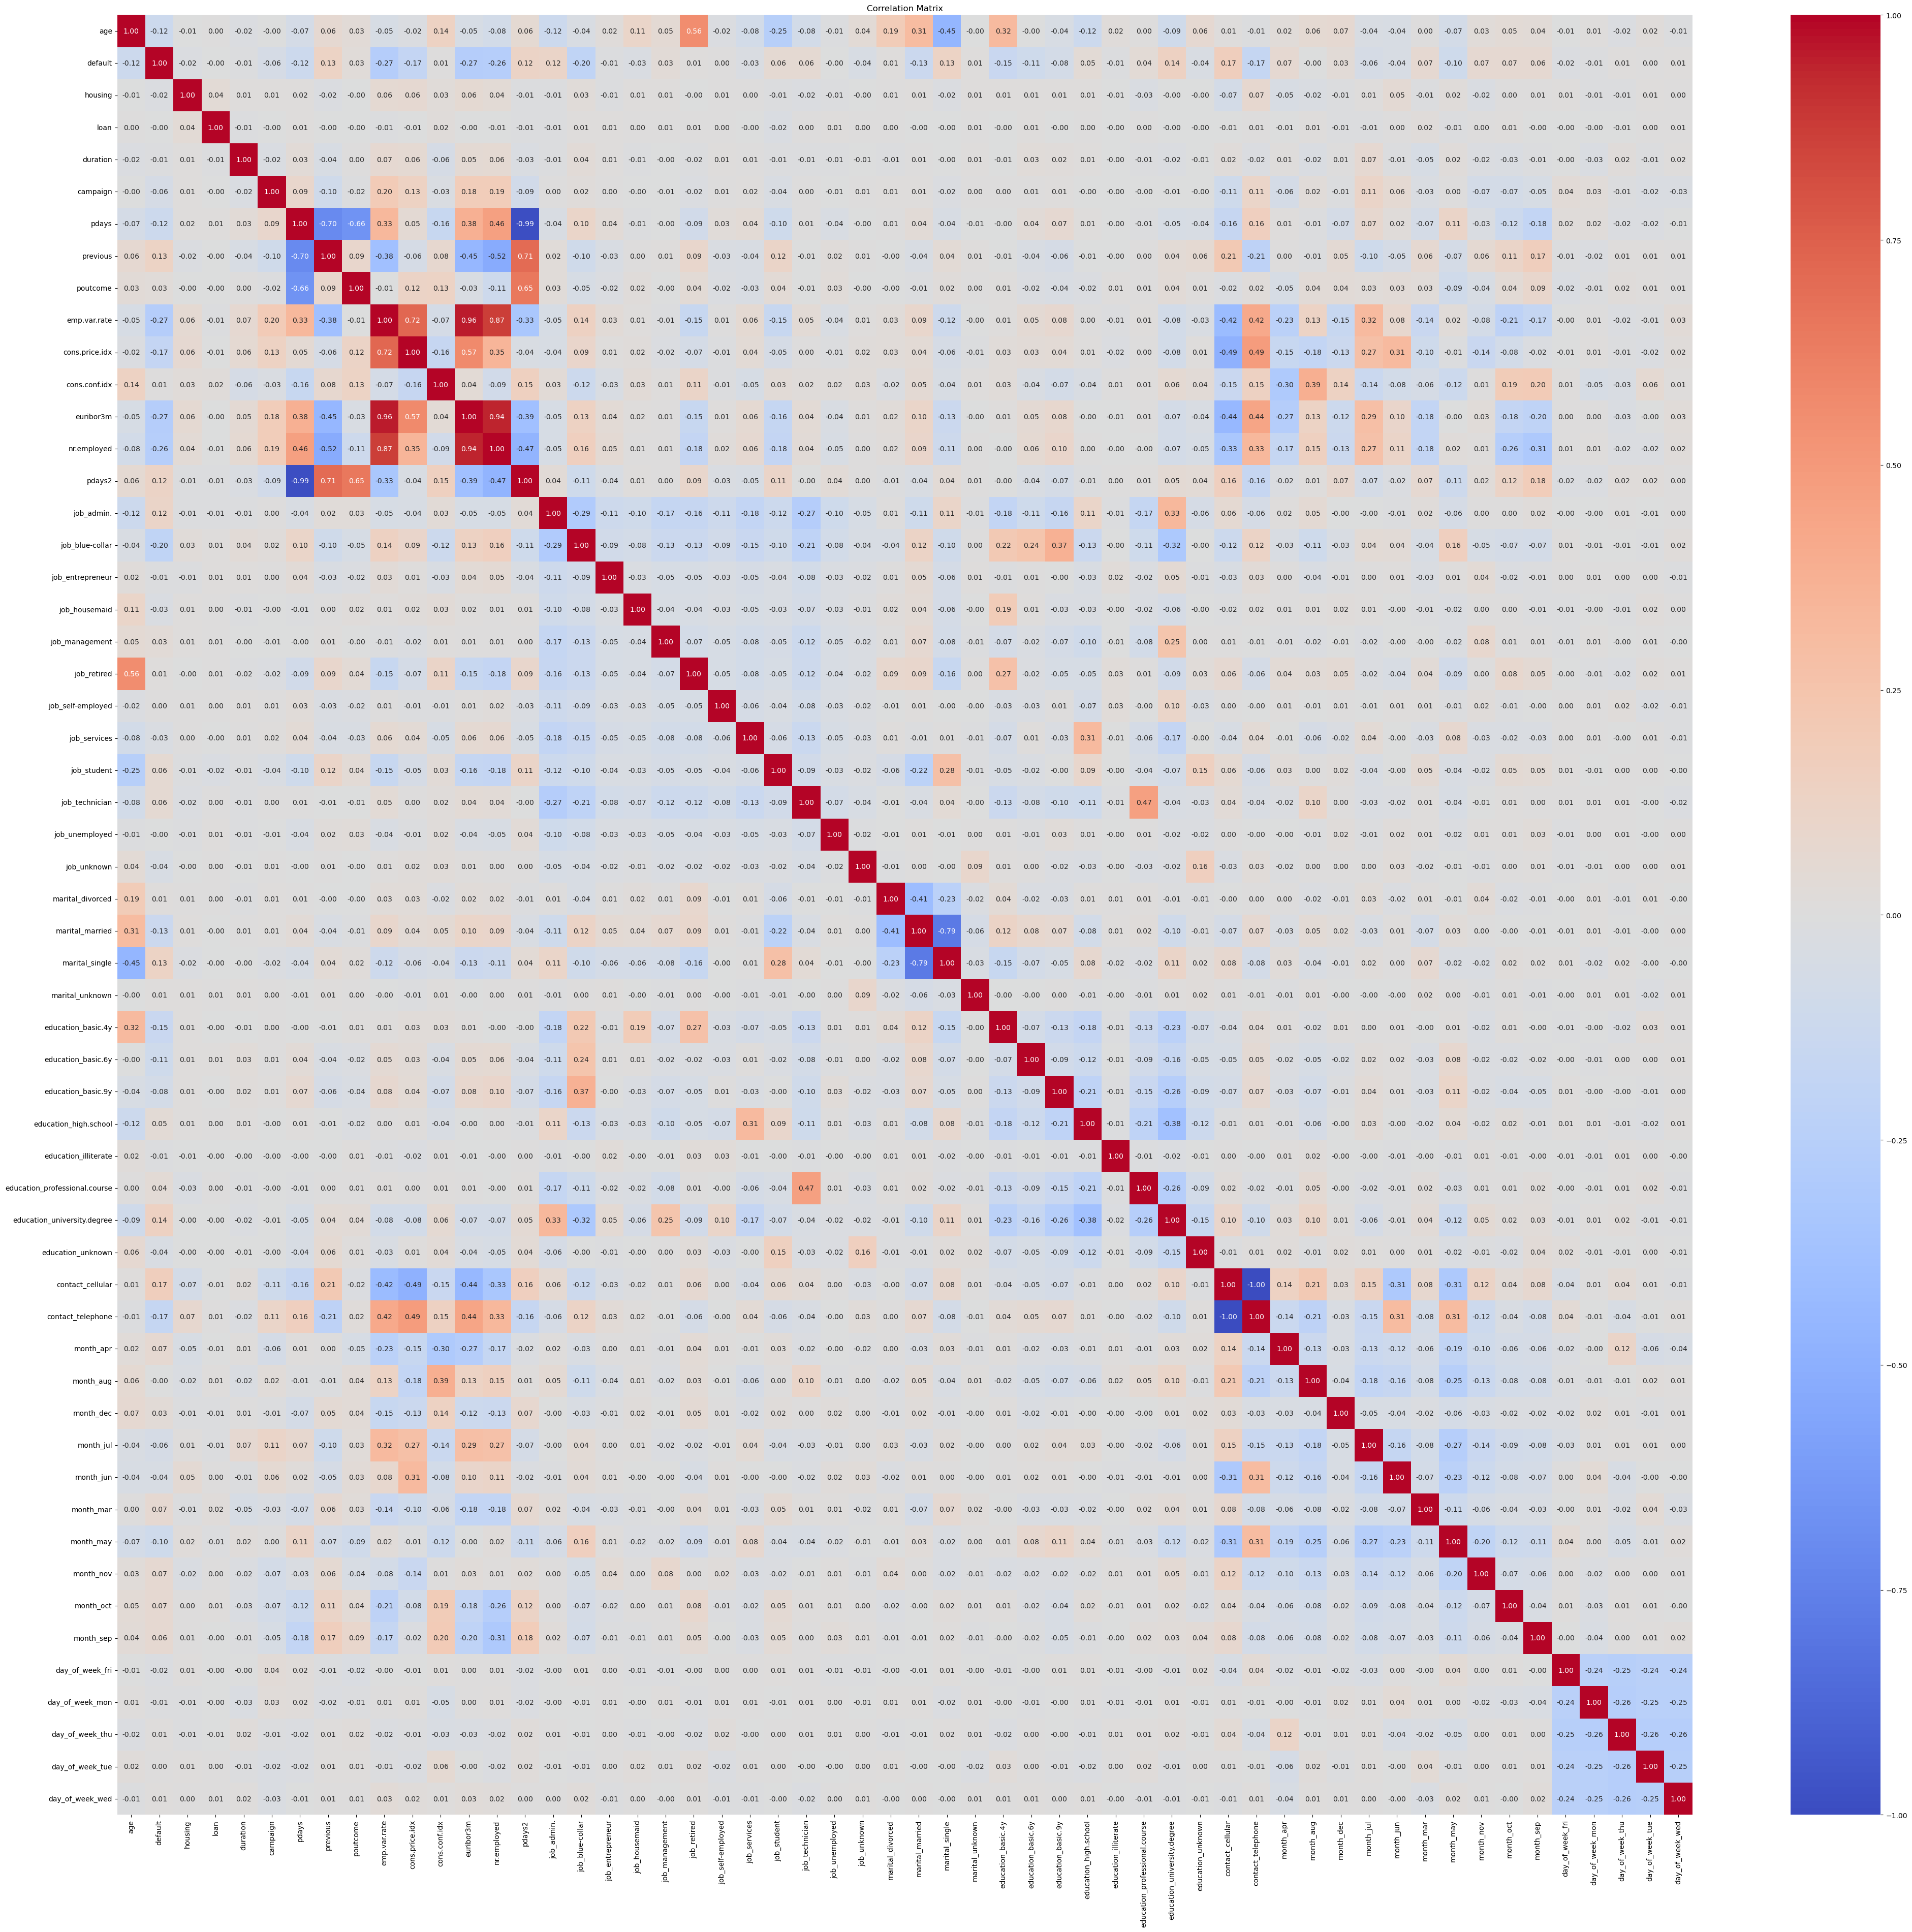

In [74]:
# Compute correlation matrix
correlation_matrix = TData.drop('y', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(50, 46))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [70]:
importances = rf_classifier.feature_importances_
feature_names = TData.drop('y', axis=1).columns

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance'])
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances)

                               importance
duration                         0.379011
euribor3m                        0.092795
nr.employed                      0.072568
age                              0.057190
emp.var.rate                     0.042997
campaign                         0.029796
cons.conf.idx                    0.023837
cons.price.idx                   0.021282
poutcome                         0.018396
pdays                            0.016217
housing                          0.013430
month_may                        0.011298
pdays2                           0.011069
previous                         0.010678
loan                             0.009683
contact_telephone                0.009161
default                          0.008710
marital_married                  0.008011
contact_cellular                 0.007870
education_university.degree      0.007727
day_of_week_mon                  0.007598
job_admin.                       0.007409
marital_single                   0

# To improve the count of individuals subscribing to term deposits ("yes" count), it's essential to focus on the top features that have the most significant impact on the prediction outcome. Here's a summary focusing on these key features:

## Duration: The duration of the contact with the client during the marketing campaign is the most influential factor in predicting whether the client will subscribe to a term deposit. Longer durations of contact are associated with a higher likelihood of subscription.

## Euribor 3-month rate: The Euribor 3-month rate is an important economic indicator that reflects prevailing interest rates in the market. Higher Euribor rates may deter individuals from subscribing to term deposits due to better investment opportunities elsewhere.

## Number of employees (nr.employed): The number of employees in the bank is another significant feature. A higher number of employees may indicate better customer service or a larger marketing team, potentially leading to more successful marketing campaigns.

## Age: Age is a crucial demographic factor influencing the decision to subscribe to a term deposit. Older individuals may be more conservative with their investments and thus more likely to opt for term deposits as a secure investment option.

## Employment variation rate (emp.var.rate): The employment variation rate reflects changes in the labor market. Economic instability, as indicated by high employment variation rates, may influence individuals to opt for term deposits as a safe investment during uncertain times.